STUDENT PERFORMANCE INDICATOR

Life cycle of machine learning project                                     
 1.Understanding the project life cycle                                    
 2.Data collection                                                         
 3.Data check to performance                                               
 4.Exploratry data analysis                                                
 5.Data pre-processing                                                     
 6.Model training                                                          
 7.Choose best model 

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data/stud.csv")

Shows top 5 records

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##Shape of the datasets

In [8]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform


- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the dataset

#### 3.2 Check Duplicates

In [10]:
df.duplicated().sum()

0

#### There are no Duplicates values in the dataset

### Check datatypes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of Unique values from each columns

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check the statistics of the datasets

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [18]:
print("Categories in gender variable:   ",end=" ")
df['gender'].unique()

Categories in gender variable:    

array(['female', 'male'], dtype=object)

In [19]:
print("Categories in gender variable:   ",end=" ")
df['gender'].unique()

Categories in gender variable:    

array(['female', 'male'], dtype=object)

In [22]:
df_col=df.columns
for i in df_col:
    print(f"Categories in {i} variable: ",end=" ")
    print(df[i].unique())
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Categories in gender variable:  ['female' 'male']
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categories in lunch variable:  ['standard' 'free/reduced']
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categories in test_preparation_course variable:  ['none' 'completed']
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categories in math_score variable:  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
 

In [31]:
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [33]:
print("we have {} numerical features :{} ".format(len(numerical_features),numerical_features))
print("we have {} categorical features :{}".format(len(categorical_features),categorical_features))

we have 3 numerical features :['math_score', 'reading_score', 'writing_score'] 
we have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total score" and "Average score"

In [36]:
df["Total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["avg_score"]=df["Total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [52]:
reading_fullmarks=df[df["reading_score"]==100]["avg_score"].count()
writing_full_score=df[df["writing_score"]==100]["avg_score"].count()
math_full_score=df[df["math_score"]==100]["math_score"].count()


In [53]:
print(f"Number of students with full marks in math_Score {math_full_score}")
print(f"Number of students with full marks in reading_Score {reading_fullmarks}")
print(f"Number of students with full marks in writing_score {writing_full_score}")

Number of students with full marks in math_Score 7
Number of students with full marks in reading_Score 17
Number of students with full marks in writing_score 14


In [57]:
reading_less_20=df[df["reading_score"]<20]["avg_score"].count()
writing_less_20=df[df["writing_score"]<20]["avg_score"].count()
math_less_20=df[df["math_score"]<20]["avg_score"].count()
print("reading score less than 20 ",reading_less_20)
print("writing score less than 20",writing_less_20)
print("math score less than 20",math_less_20)

reading score less than 20  1
writing score less than 20 3
math score less than 20 4


### Insights
- from the above value we would understand worst performace in math.
- Best performance in reading

### 4.Exploratry data (Visualization)
### 4.1 visualize average score distribution to make some conclusion
- Histogram:A histogram is a chart that plots the distribution of a numeric variable's values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; a bar's height indicates the frequency of data points with a value within the corresponding bin.

- Kernel density function (KDE):KDE (Kernel Density Estimation) is a smooth curve that shows the distribution of a dataset — similar to a histogram, but smoother.

- A histogram shows counts in bars.

- A KDE shows a smooth curve over the data.

- It helps you understand the shape of the data: is it normal (bell-shaped), skewed, etc.



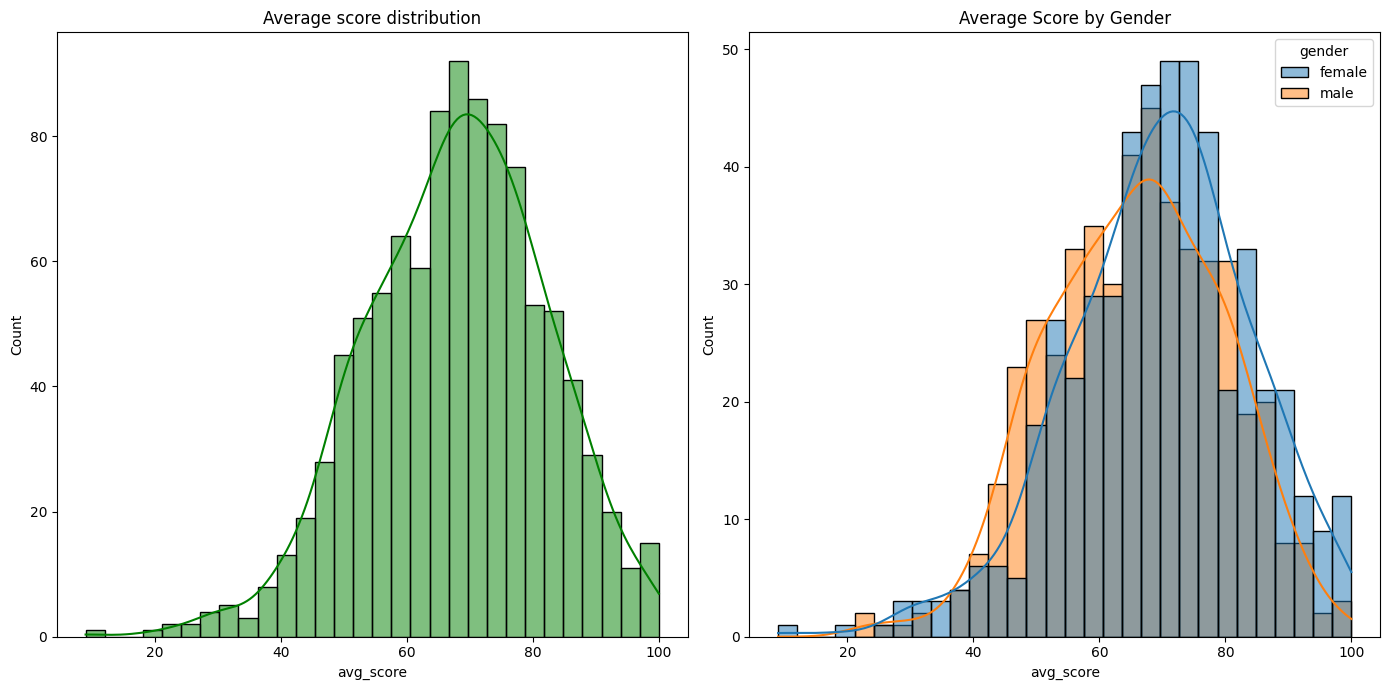

In [65]:
fig,axs=plt.subplots(1,2,figsize=(14,7))
sns.histplot(data=df,x="avg_score",color='g',kde=True,bins=30,ax=axs[0])
axs[0].set_title("Average score distribution")
sns.histplot(data=df,x="avg_score",color='g',kde=True,hue='gender',bins=30,ax=axs[1])
axs[1].set_title("Average Score by Gender")
plt.tight_layout()
plt.show()


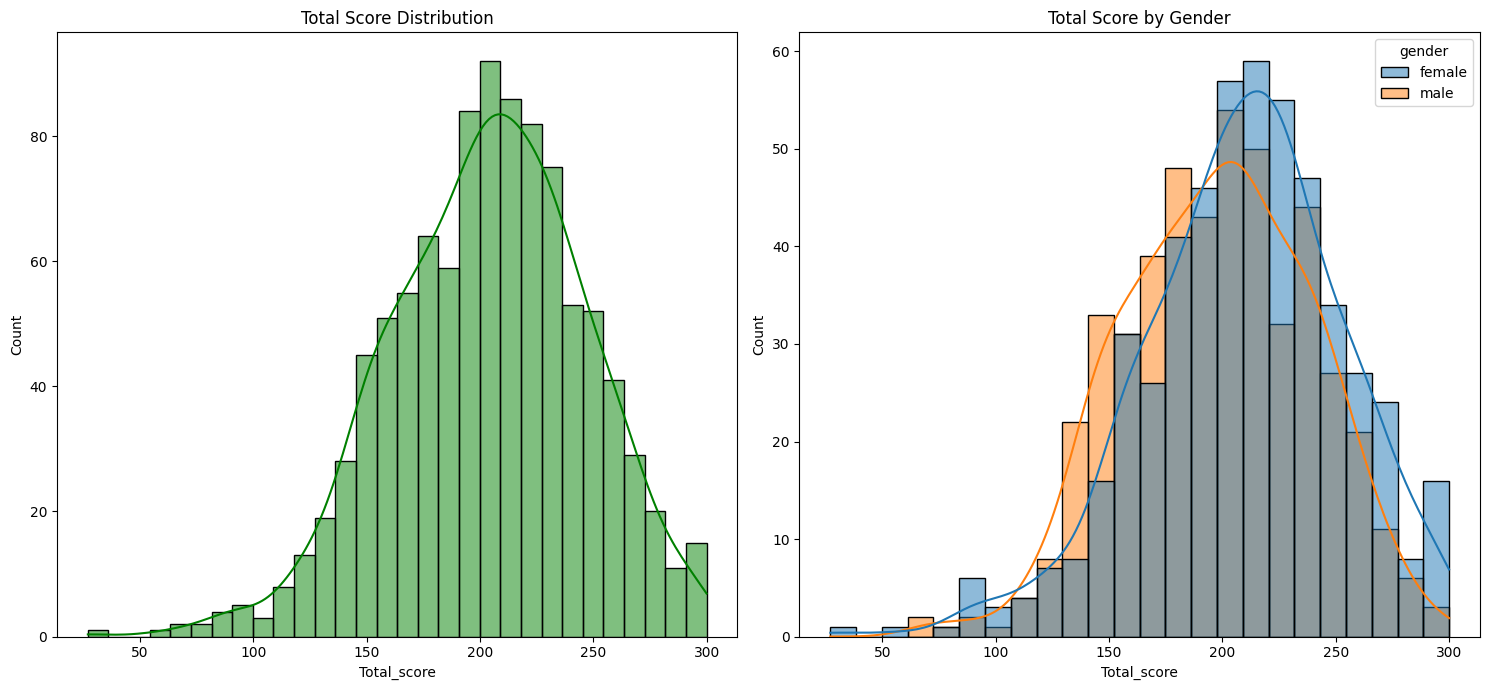

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='Total_score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Total Score Distribution")
sns.histplot(data=df, x='Total_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Total Score by Gender")
plt.tight_layout()
plt.show()

#####  Insights
- Female students tend to perform well then male students.

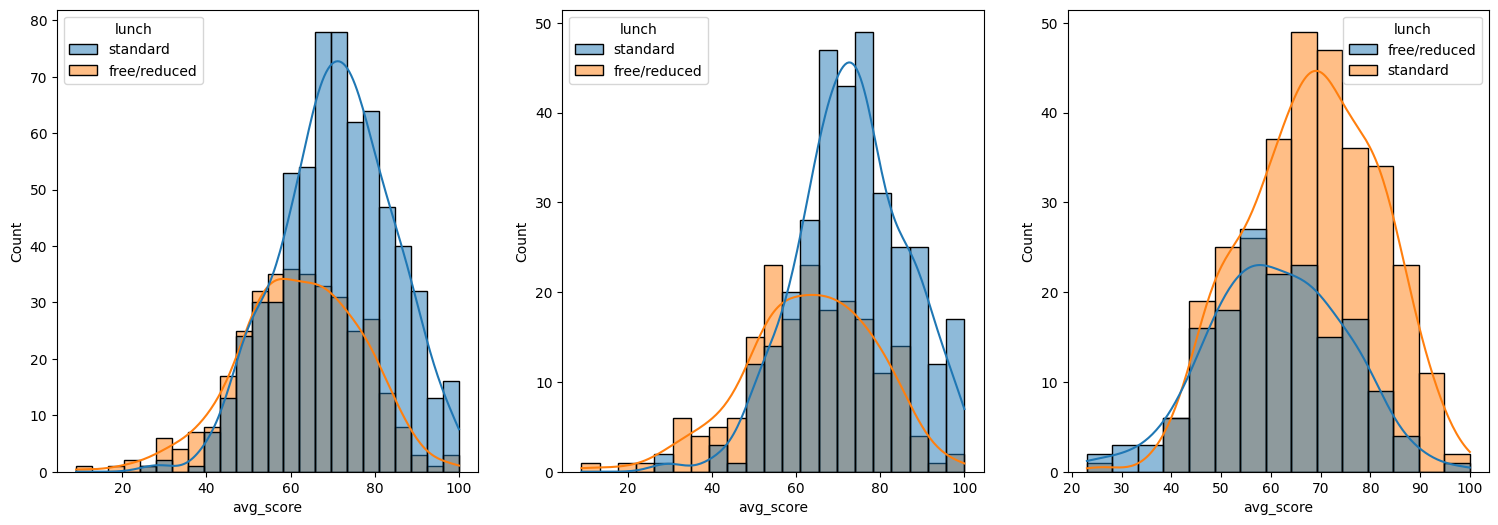

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='lunch')
plt.show()

### explanation
- Makes a wide window (25×6 inches) for 3 graphs in one row
- Shows everyone's scores
### Graph 1: All Students (left)

- Colors show lunch types (e.g., free lunch vs. paid lunch)
- Smooth line shows the pattern

### Graph 2: Only Girls (middle)
- Same as Graph 1, but only female students
- Compares their lunch types

### Graph 3: Only Boys (right)
- Same as Graph 1, but only male students
- Compares their lunch types

In [83]:
print(df.columns.tolist())

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'Total_score', 'avg_score']


In [84]:
df.columns = df.columns.str.strip()

In [88]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'avg_score'],
      dtype='object')